In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [5]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [13]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [16]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [18]:
df.columns=['Category','Message']

In [19]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [21]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

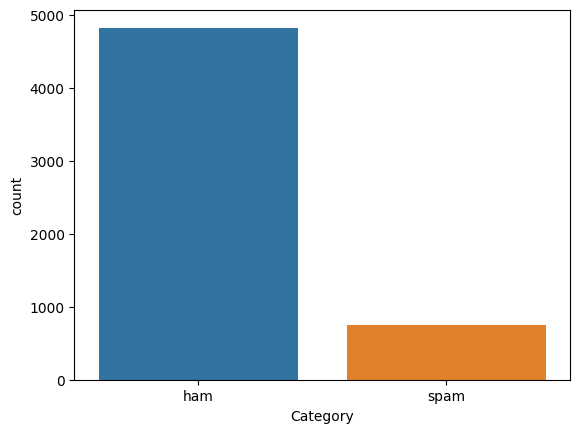

In [30]:
sns.countplot(x='Category',data=df)
plt.show()

In [32]:
df.drop_duplicates(inplace=True)
df=df.fillna(' ')

In [33]:
train,test=train_test_split(df,test_size=0.30)
train_x=df['Message'].values
train_y=df['Category'].values

test_x=df['Message'].values
test_y=df['Category'].values

In [34]:
cv=CountVectorizer()
train_x=cv.fit_transform(train_x)
test_x=cv.transform(test_x)

In [35]:
model=SVC()
model.fit(train_x,train_y)
predct=model.predict(test_x)
metrics.accuracy_score(predct,test_y)

0.995550396595086

In [36]:
train_accuracy=model.score(train_x,train_y)
test_accuracy=model.score(test_x,test_y)
print(train_accuracy)
print(test_accuracy)

0.995550396595086
0.995550396595086


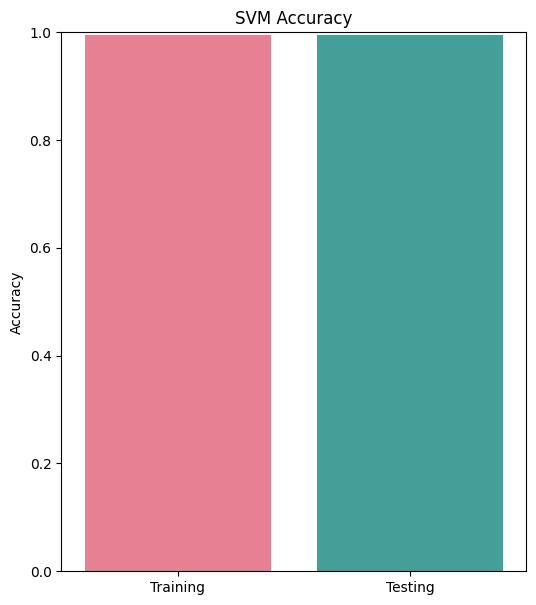

In [38]:
plt.figure(figsize=(6,7))
sns.barplot(x=['Training','Testing'],y=[train_accuracy,test_accuracy],palette='husl')
plt.ylim([0,1])
plt.ylabel('Accuracy')
plt.title('SVM Accuracy')
plt.show()

In [39]:
model=RandomForestClassifier()
model.fit(train_x,train_y)
predct=model.predict(test_x)
metrics.accuracy_score(predct,test_y)

1.0

In [40]:
train_accuracy=model.score(train_x,train_y)
test_accuracy=model.score(test_x,test_y)
print(train_accuracy)
print(test_accuracy)

1.0
1.0


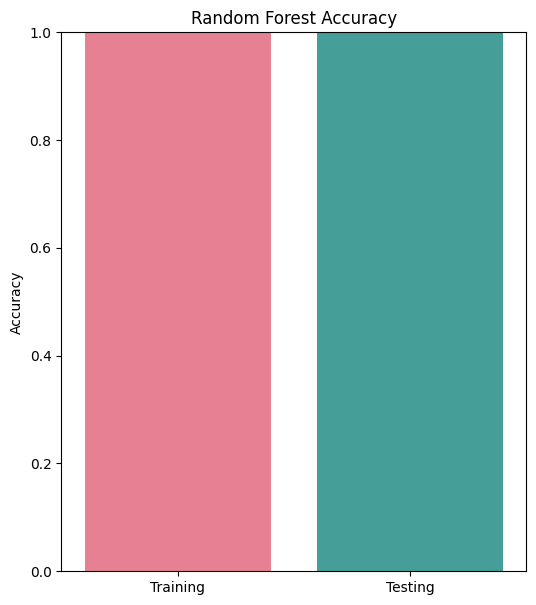

In [44]:
plt.figure(figsize=(6,7))
sns.barplot(x=['Training','Testing'],y=[train_accuracy,test_accuracy],palette='husl')
plt.ylim([0,1])
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy')
plt.show()